# DS 2500 HW 6

Due: Fri Mar 24 @ 11:59PM

### Submission Instructions
Please submit both of the following to the corresponding [gradescope](https://www.gradescope.com/courses/478298) assignment:
- this `.ipynb` file
    - give a fresh `Kernel > Restart & Run All` just before uploading
- a `.py` file consistent with your `.ipynb`
    - `File > Download as ...`

### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds2500/admin_piazza.html)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds2500/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds2500/python_style.html)
- [No student may view or share their ungraded homework with another](https://course.ccs.neu.edu/ds2500/syllabus.html#academic-integrity-and-conduct)

| part                                        |    |
|:--------------------------------------------|---:|
| Part 1.1: Car weight & power                | 15 |
| Part 2: Polynomial Fitting                  | 35 |
| Part 3: Clustering States by Driving Habits | 15 |
| Part 4: PCA Iris                            | 15 |
| total                                       | 80 |

This HW is a bit shorter than most to allow you time to work on your projects :)

# Part 1.1: Car weight & power (15 points)
1. Given the data below, build and plot a `LinearRegression` model as shown immediately below:

<img src="https://i.ibb.co/W2X3BWb/horsepower-vs-weight.png" width=700>

Your output should be as aesthetically-good-looking and clear, but you needn't follow our color scheme / font sizes exactly.


In [1]:
import seaborn as sns

df_car = sns.load_dataset('mpg')
df_car.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

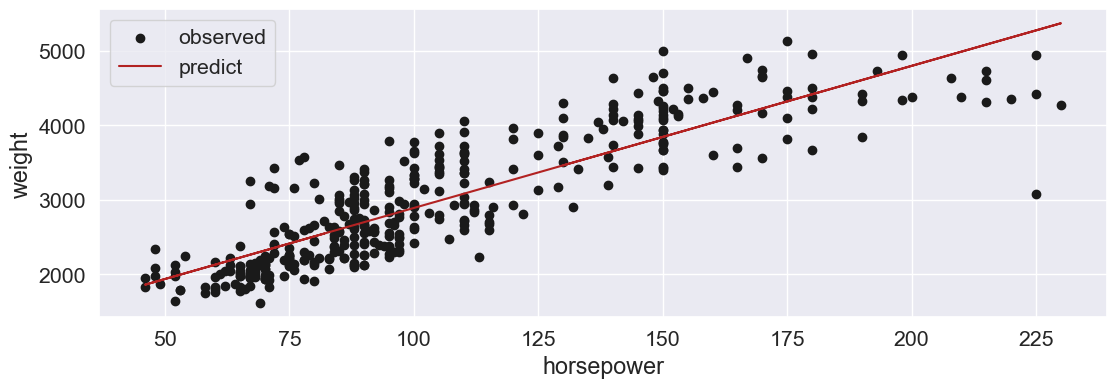

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set(font_scale=1.4)

# discard any rows missing data
df_car.dropna(axis=0, inplace=True)

# extract relevant data
x_feat = 'horsepower'
y_feat = 'weight'

x = df_car.loc[:, x_feat].values
y_true = df_car.loc[:, y_feat].values

# reshape x to be 2D
x = x.reshape(-1, 1)

# fit and predict regression model
reg = LinearRegression()
reg.fit(x, y_true)
y_pred = reg.predict(x)
    
# plot regression model on top of scatter plot
plt.scatter(x, y_true, label='observed', color='k')
plt.plot(x, y_pred, label='predict', color='firebrick')
plt.xlabel(x_feat)
plt.ylabel(y_feat)
plt.legend()

plt.gcf().set_size_inches(13, 4)

# Part 1.2: Interpretting Regressions (20 points, 10 each)

Answer each of the questions below by
- writing a few lines of relevant python code in one or two code cells
- writing one or two clear, succinct sentence response in markdown just below

1. Compute and interpret a quantification of how good the model in part 1.1 is.  How helpful is horsepower in explaining differences in the weight of a car for this particular set of cars?
1. One car has 50 more horsepower than another.  Using the model from part 1.1, whats our best guess as to how much heavier the more powerful car is?

In [3]:
# computing r^2 score
r2 = r2_score(y_true=y_true, y_pred=y_pred)
print(f'r^2={r2:.3f}')

r^2=0.747


The R^2 score indicates the strength of the regression model. An R^2 score of 0.75 means that 75% of the variation in the weight of a car can be explained by horsepower, meaning that horsepower is a relatively helpful variable in explaining differences in the weight of a car.

Based on the model, if one car has 50 more horsepower than another, the more powerful car is estimated to 1000 units heavier.

# Part 2: Polynomial Fitting (35 points)

Identify the polynomial that `x, y` likely comes from.  Your response should be written out (may be done in markdown, not programmatically) as:

$$y = 1 + 2x + 3x^2$$
    
or similar.  Please round your coefficients to 2 decimal places so they're easily read.  Be sure to justify your chosen polynomial [degree](https://en.wikipedia.org/wiki/Degree_of_a_polynomial) with a graph and a sentence.

#### Hints:
- How do I pick a polynomial degree?
    - see "Preventing Overfitting" from day 17
    - a `plt.plot()` of degree vs cross validated r2 might be a helpful
    - “Everything should be made as simple as possible, but no simpler.” 
- there is an order to our x variables, the earlier entries are often lower
    - this feels like the chinstrap tragedy from day 13 ...
- after cross validation I'll have a bunch of models, which do I report in my final polynomial estimate?
    - none of these cross validated models are approrpiate

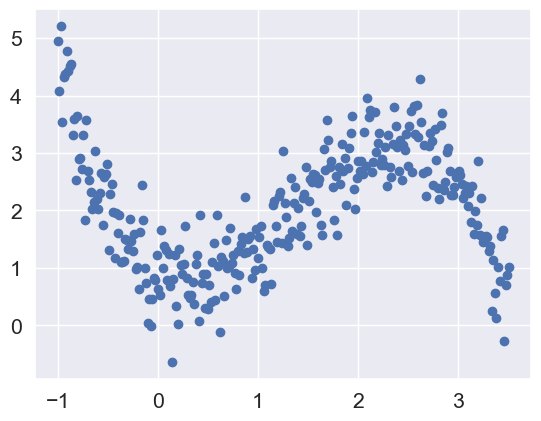

In [4]:
import pickle

# loads arrays x and y from file
with open('xy_hw6.p', 'rb') as f:
    x, y = pickle.load(f)
    
# # having trouble with the pickle file?  use the csv as a backup
# df = pd.read_csv('xy_hw6.csv')
# x = df['x'].values
# y = df['y'].values

plt.scatter(x, y);

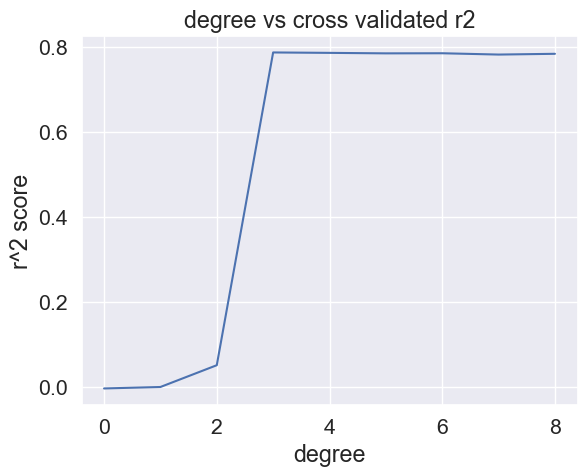

In [5]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

n_splits = 10

# initialize k fold
kfold = KFold(n_splits=n_splits, shuffle=True)

# create an initial dictionary to store r^2 values
r2_dict = dict()

# go through each degree
for degree in range(9):

    # process x to polynomial features
    poly_feat = PolynomialFeatures(degree=degree)
    x_poly = poly_feat.fit_transform(x)

    # fit polynomial regression
    reg = LinearRegression(fit_intercept=False)
    reg.fit(x_poly, y)

    # predict y
    y_pred = reg.predict(x_poly)

    for train_idx, test_idx in kfold.split(x_poly, y):
        # get training data
        x_train = x_poly[train_idx, :]
        y_train = y[train_idx]

        # get test data
        x_test = x_poly[test_idx, :]

        # fit data
        reg = reg.fit(x_train, y_train)

        # estimate on test data
        y_pred[test_idx] = reg.predict(x_test)
    
    # calculate and store r2 score
    r2 = r2_score(y_true = y, y_pred = y_pred)
    r2_dict[degree] = r2
    
# plot r2 score against degree
plt.plot(r2_dict.keys(), r2_dict.values())

plt.xlabel('degree')
plt.ylabel('r^2 score')
plt.title('degree vs cross validated r2')
plt.show()

Based on the above graph, the elbow is at 3, making it the appropriate degree for the polynomial regression.

In [6]:
# copied from notes day 16

def coef_to_poly_str(coef, include_zero=False):
    """ creates a str of polynomial corresponding to coef    

    Args:
        coef (np.array): coefficients of polynomial
        
    Returns:
        poly_str (str): str of polynomial
    """
    
    str_monomial_list = []
    for deg, coef in enumerate(coef):
        if coef == 0 and include_zero == False:
            # this coefficient is zero, just skip it altogether
            continue
            
        str_monomial_list.append(f'{coef:+.1f} x^{deg:d}')
        
    return 'y = ' + ' '.join(str_monomial_list)

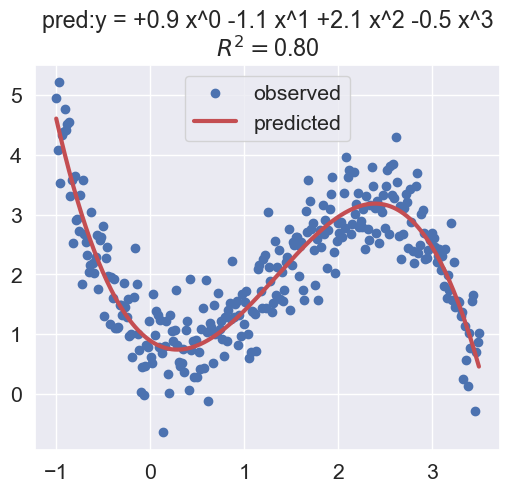

In [7]:
degree = 3

# process x to polynomial features
poly_feat = PolynomialFeatures(degree=degree)
x_poly = poly_feat.fit_transform(x)

# fit polynomial regression
reg = LinearRegression(fit_intercept=False)
reg.fit(x_poly, y)

# predict y (from regression)
y_pred = reg.predict(x_poly)

# plot scatterplot and polynomial regression
plt.scatter(x, y, label='observed')
plt.plot(x, y_pred, color='r', linewidth=3, label='predicted')

# collect coefficients
coef_pred = reg.coef_
coef_pred = coef_pred.flatten()

# create a str of polynomial
str_poly_pred = coef_to_poly_str(coef_pred)

plt.title(f'pred:{str_poly_pred}\n$R^2=${r2_score(y, y_pred):.2f}')
plt.legend()
plt.gcf().set_size_inches(6, 5)

Based on the graph above, the polynomial regression is y = 0.9 - 1.1x + 2.1x^2 - 0.5x^3

# Part 3: Clustering States by Driving Habits  (15 points)

Use K-Means clustering to cluster all the states into k sub-groups so that each sub-group has similar car crash statistics.  
- Build a graph of how the mean distance from sample to centroid changes as k increases from two to seven.
- Write one or two sentences which give the number of sub-groups best suited for this data (i.e. find the "elbow").  
    - If no particular k seems much better than the others, characterize what about the graph leads you to this conclusion.

Hint:
- is this raw data, without any preprocessing steps applied, appropriate for clustering?
    - no

In [8]:
df_car = sns.load_dataset('car_crashes')
df_car.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

In [9]:
import pandas as pd

# scale normalize columns
for feat in df_car.columns[:-1]:
    df_car[feat] = df_car[feat] / df_car[feat].std()
    
df_car.head()

total  speeding   alcohol  not_distracted  no_previous  ins_premium  \
0  4.560890  3.633756  3.261750        4.002682     3.995036     4.400260   
1  4.391070  3.677864  2.616919        3.612793     4.519385     5.908592   
2  4.512370  3.226371  3.011914        3.465087     4.743043     5.044805   
3  5.434252  1.998268  3.368162        4.669795     5.652551     4.640254   
4  2.911207  2.081529  1.943170        2.421835     2.836901     4.926687   

   ins_losses abbrev  
0    5.841539     AL  
1    5.392592     AK  
2    4.443161     AZ  
3    5.733228     AR  
4    6.668969     CA

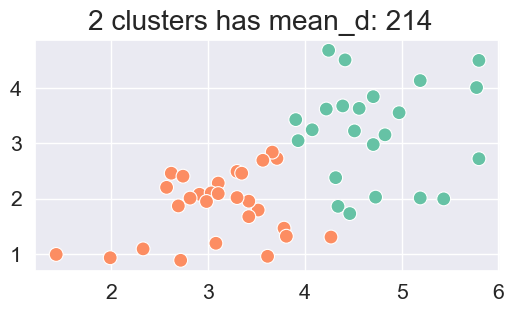

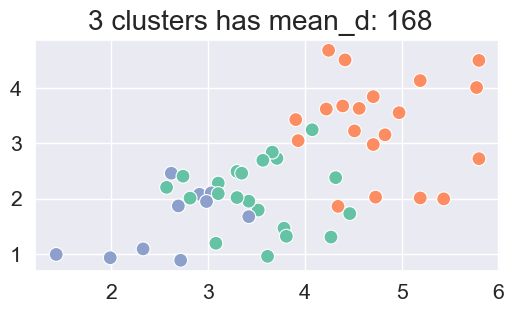

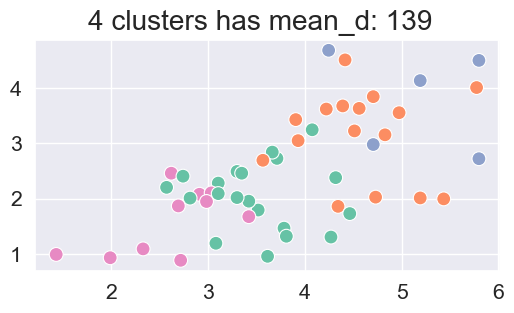

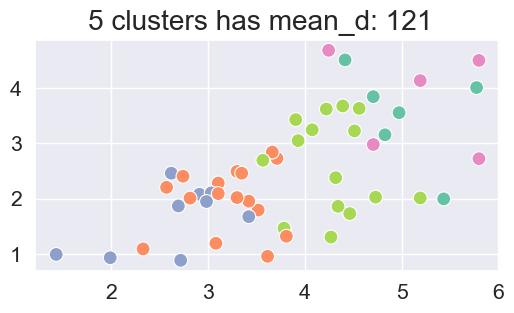

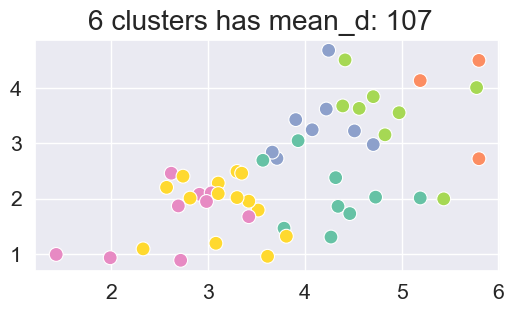

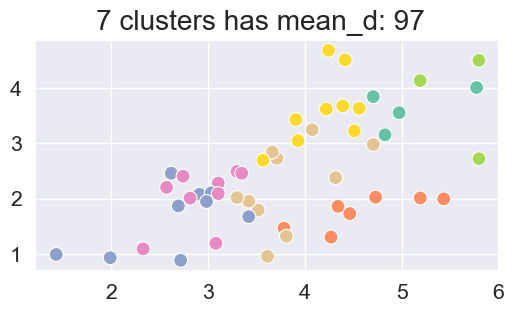

In [10]:
from sklearn.cluster import KMeans

# extract relevant data
x_feat_list = ['total','speeding','alcohol','not_distracted','no_previous','ins_premium','ins_losses']
x = df_car.loc[:, x_feat_list].values

# initialize a dictionary to store mean distance from each sample to its cluster centroid
mean_d_dict = dict()

# loop for each possible number of clusters
for n_clusters in range(2, 8):
    # fit kmeans
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)    
        
    # compute & store mean distance
    mean_d = -kmeans.score(x)
    mean_d_dict[n_clusters] = mean_d

    # plot clustering
    plt.figure()
    sns.scatterplot(x=x[:, 0], y=x[:, 1], s=100, hue=y, palette='Set2')
    plt.suptitle(f'{n_clusters} clusters has mean_d: {mean_d:.0f}')
    plt.gca().get_legend().remove()
    plt.gcf().set_size_inches(6, 3)
    

Text(0, 0.5, 'mean dist^2 to centroid')

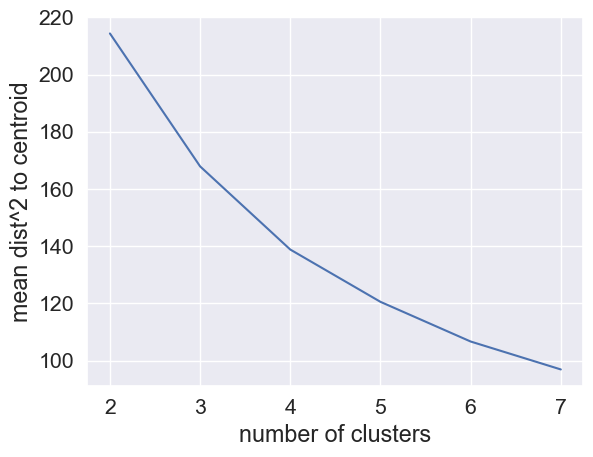

In [11]:
# plot clusters v mean distance from sample to centroid
plt.plot(mean_d_dict.keys(), mean_d_dict.values())
plt.xlabel('number of clusters')
plt.ylabel('mean dist^2 to centroid')

Although there is no clear elbow on the graph, indicating that no particular k seems much better than the others, a k value of 4 looks to be the optimal number of clusters.

<Figure size 640x480 with 0 Axes>

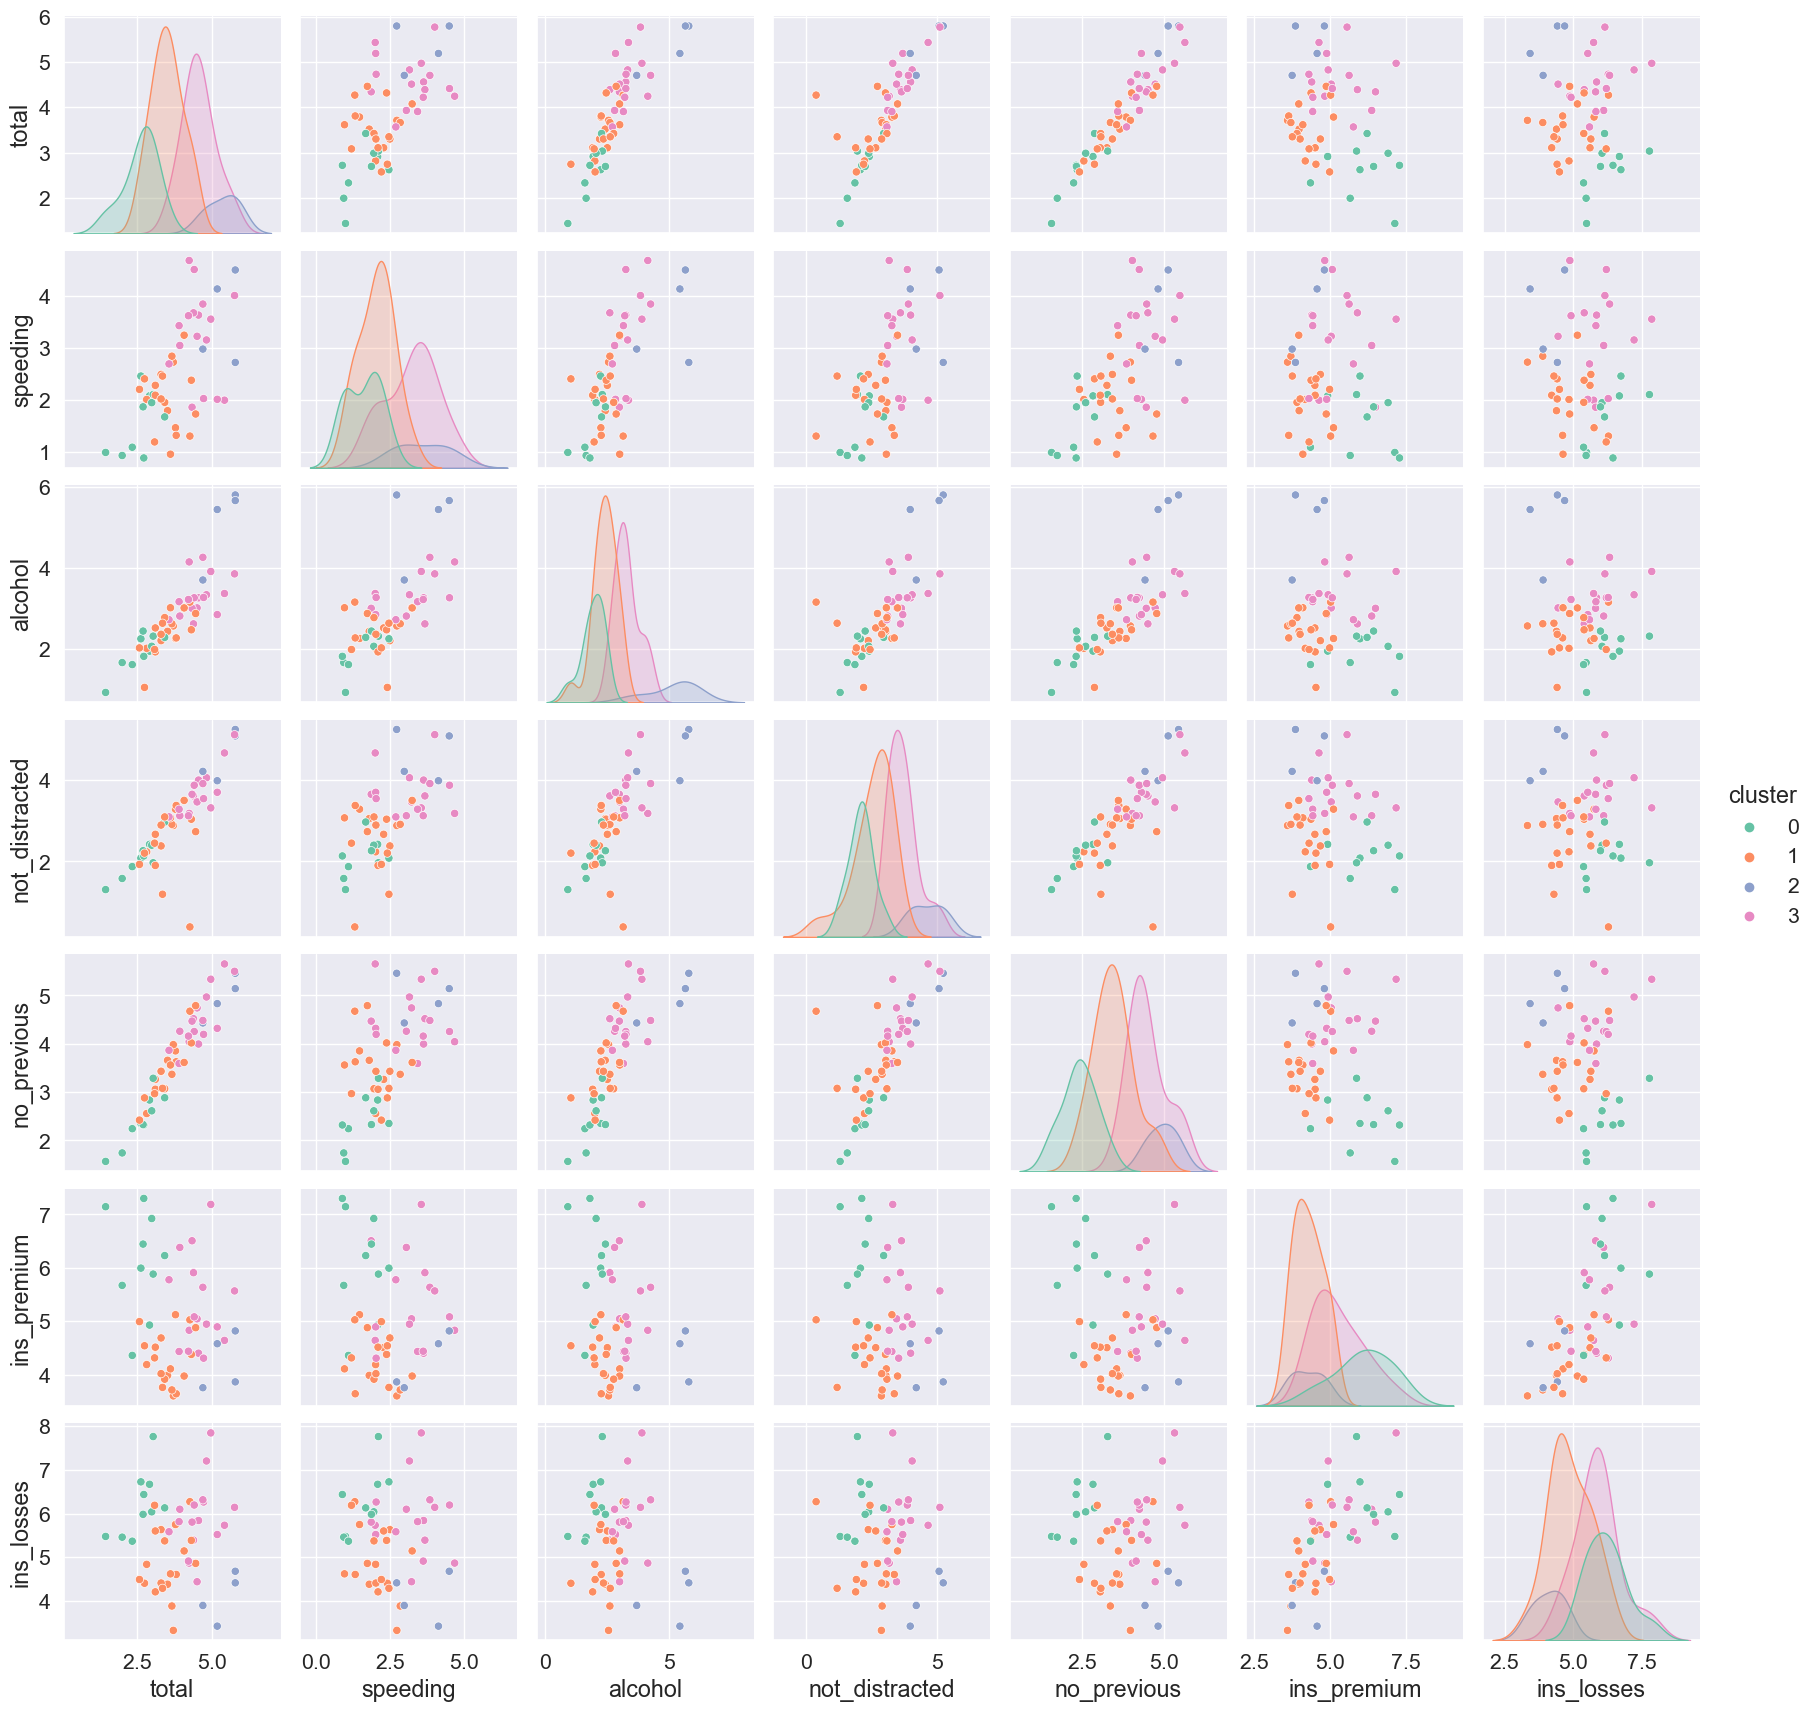

In [12]:
n_clusters = 4

# fit kmeans
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)

# plot all possible combos
plt.figure()
plt.suptitle(f'{n_clusters} clusters has mean_d: {mean_d: 1e}')
df_car['cluster'] = y
sns.pairplot(data=df_car, hue='cluster', palette='Set2');

# Part 4: PCA Iris (15 points)
Build the following "Principal Component Map" from all four features in the iris dataset below.  

<img src='https://i.ibb.co/2Ktt1Xm/iris-pca.png' width=800px>

You're welcome to submit a `matplotlib` scatter for full credit, but you may find the interactive `plotly` graph more fun to work with.  You can install plotly with `pip3 install plotly` or similar and build the necessary scatter plot with:
```python
import plotly.express as px

fig = px.scatter(df_iris, x='pca0', y='pca1', hover_data=df_iris.columns, color='species')
fig.show()

# if you want to export to html (not needed for HW at all, just good to know!)
fig.write_html('iris_pca.html')
```

In [13]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [14]:
df_iris = sns.load_dataset('iris')

df_iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [15]:
import plotly.express as px
from sklearn.decomposition import PCA

# extract relevant x values
x_feat_list = ['sepal_length','sepal_width','petal_length','petal_width']
x = df_iris.loc[:, x_feat_list].values

# compress
pca = PCA(n_components=2, whiten=False)
x_compress = pca.fit_transform(x)

# add features back into dataframe (for plotting)
df_iris['pca0'] = x_compress[:, 0]
df_iris['pca1'] = x_compress[:, 1]

# scatter plot
fig = px.scatter(df_iris, x='pca0', y='pca1', hover_data=df_iris.columns, color='species')
fig.show()

fig.write_html('iris_pca.html')